In [216]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_rows', 1000)
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

In [217]:
import pandas as pd
import matplotlib.pyplot as plt


urls = [
    "https://drive.google.com/file/d/1afxwDXfl-7cQ_qLwyDitfcCx3u7WMvkU/view?usp=drive_link",
    "https://drive.google.com/file/d/1Vu0q91qZw6lqhIqbjoXYvYAQTmVHh6uZ/view?usp=drive_link",
    "https://drive.google.com/file/d/1FYhN_2AzTBFuWcfHaRuKcuCE6CWXsWtG/view?usp=drive_link",
    "https://drive.google.com/file/d/1m1ThDDIYRTTii-rqM5SEQjJ8McidJskD/view?usp=drive_link"
]

file_names = ["df_prod.csv", "df_orders.csv", "df_orderlines.csv", "df_brands.csv"]

def read_csv_from_drive(url, file_name):
    path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
    return pd.read_csv(path)

df_prod, df_orders, df_orderlines, df_brands = [read_csv_from_drive(url, file_name) for url, file_name in zip(urls, file_names)]

df_prod.head()

,sku,name,desc,price,promo_price,in_stock,type
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,499.899,1,8696
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59,589.996,0,13855401
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59,569.898,0,1387
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25,229.997,0,1230
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,31.99,1,1364


In [218]:
df=df_prod.copy()

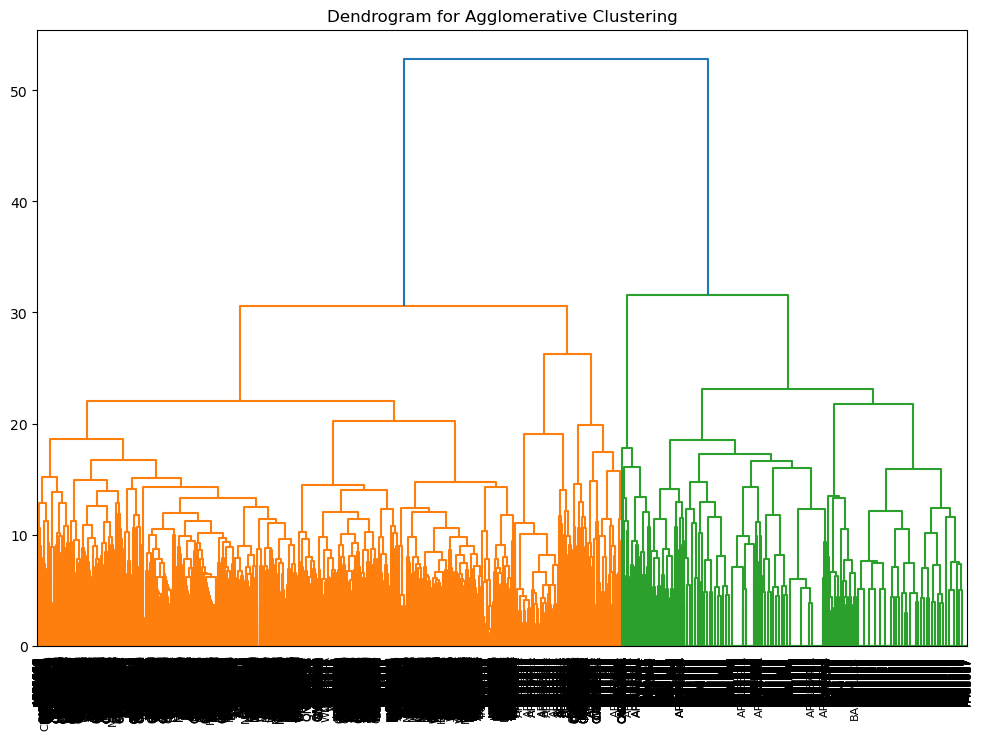

In [222]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Load your dataset
# Assuming your DataFrame is named 'df'
# Replace 'your_filename.csv' with the actual filename if your data is in a CSV file
# df = pd.read_csv('your_filename.csv')

# Fill missing values in the 'desc' column with empty strings
df['desc'].fillna('', inplace=True)

# Combine 'name' and 'desc' columns into a new column 'combined_text'
#df['combined_text'] = df['name'] + ' ' + df['desc']

# Convert text data to TF-IDF matrix
vectorizer = TfidfVectorizer()
#tfidf_matrix = vectorizer.fit_transform(df['combined_text'])
tfidf_matrix = vectorizer.fit_transform(df['desc'])

# Convert the TF-IDF matrix to dense format
tfidf_matrix_dense = tfidf_matrix.toarray()

# Calculate Jaccard distance
jaccard_distance = pairwise_distances(tfidf_matrix_dense, metric='jaccard')

# Perform Agglomerative clustering
agg_clusters = linkage(jaccard_distance, method='complete')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(agg_clusters, labels=df['sku'].tolist(), leaf_rotation=90, leaf_font_size=8)
plt.title('Dendrogram for Agglomerative Clustering')
plt.show()


In [224]:
agg_clusters.info()

AttributeError: 'numpy.ndarray' object has no attribute 'info'

In [209]:
# Define the file path
folder_path = r"/Users/MarwanRadi1/Documents/Data_Science_Bootcamp/Bootcamp/Chapter_3_Data_Cleaning/ENIAC_Project/cleaned_datasets"

# Rather manual stuff. But for an automated way, see Alternative II below 
df_merged_ol_prod = pd.read_csv(f"{folder_path}/df_merged_ol_prod.csv")
df_merged_ol_prod_ord = pd.read_csv(f"{folder_path}/df_merged_ol_prod_ord.csv")
merged_df = pd.merge(df_merged_ol_prod, df_merged_ol_prod_ord, left_on='id_order', right_on='order_id', how='inner')

#df_ord = pd.read_csv(f"{folder_path}\\orders.csv")
#df_orderlines = pd.read_csv(f"{folder_path}\\orderlines.csv")
#df_brands = pd.read_csv(f"{folder_path}\\brands.csv")

In [221]:
df_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19326 entries, 0 to 19325
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sku          19326 non-null  object
 1   name         19326 non-null  object
 2   desc         19319 non-null  object
 3   price        19280 non-null  object
 4   promo_price  19326 non-null  object
 5   in_stock     19326 non-null  int64 
 6   type         19276 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.0+ MB


In [211]:
import pandas as pd

# ... (assuming df_merged_ol_prod is defined)

# Create a new column for category
df_prod["category"] = ""

# Define a function to add a new category if there are less than two existing categories
def add_category(condition, category):
    # Count the number of existing categories
    existing_categories = df_prod["category"].str.count(",") + 1

    # Add the new category only if there are less than two existing categories
    df_prod.loc[condition & (existing_categories < 3), "category"] += f", {category}"

# Apply the conditions to add categories
add_category(df_prod["desc"].str.contains("keyboard", case=False), "keyboard")
add_category(df_prod["name"].str.contains("^.{0,7}apple iphone", case=False), "smartphone")
add_category(df_prod["name"].str.contains("^.{0,7}apple ipod", case=False), "ipod")
add_category(df_prod["name"].str.contains("^.{0,7}apple ipad|tablet", case=False), "tablet")
add_category(df_prod["name"].str.contains("imac|mac mini|mac pro", case=False), "desktop")
add_category(df_prod["name"].str.contains("macbook", case=False), "laptop")
add_category(df_prod["desc"].str.contains("backpack", case=False), "backpack")
add_category(df_prod["desc"].str.contains("case|funda|housing|casing|folder", case=False), "case")
add_category(df_prod["desc"].str.contains("dock|hub|connection|expansion box", case=False), "dock")
add_category(df_prod["desc"].str.contains("cable|connector|lightning to usb|wall socket|power strip", case=False), "cable")
add_category(df_prod["desc"].str.contains("flash drive|hard drive|pendrive|hard disk|memory|storage|^ssd|^hardssd|modules|ssd expansion", case=False), "storage")
add_category(df_prod["desc"].str.contains("battery", case=False), "battery")
add_category(df_prod["desc"].str.contains("headset|headphones", case=False), "headset")
add_category(df_prod["desc"].str.contains("charger", case=False), "charger")
add_category(df_prod["desc"].str.contains("mouse|trackpad", case=False), "mouse")
add_category(df_prod["desc"].str.contains("stand|support", case=False), "stand")
add_category(df_prod["desc"].str.contains("strap|armband|belt|bracelet", case=False), "strap")
add_category(df_prod["desc"].str.contains("^.{0,6}apple watch|smartwatch|smart watch", case=False), "smartwatch")
add_category(df_prod["desc"].str.contains("adapter", case=False), "adapter")
add_category(df_prod["desc"].str.contains("^.{0,7}ram", case=False), "ram")
add_category(df_prod["desc"].str.contains("protect|cover|sleeve|screensaver|shell", case=False), "protection")
add_category(df_prod["desc"].str.contains("nas|server|raid|synology", case=False), "server")
add_category(df_prod["desc"].str.contains("scale", case=False), "scale")
add_category(df_prod["desc"].str.contains("thermometer", case=False), "thermometer")
add_category(df_prod["desc"].str.contains("monitor", case=False), "monitor")
add_category(df_prod["desc"].str.contains("speaker|music system", case=False), "speaker")
add_category(df_prod["desc"].str.contains("camera", case=False), "camera")
add_category(df_prod["desc"].str.contains("pointer", case=False), "pointer")
add_category(df_prod["desc"].str.contains("refurbished|reconditioned|like new", case=False), "refurbished")

# Add the default category for rows where no category is assigned
df_prod.loc[df_prod["category"] == "", "category"] += ", other"

# Display the DataFrame to check the result
print(df_prod["category"])


0                   , stand
1                , keyboard
2            , cable, mouse
3             , dock, cable
4                     , ram
                ...        
19321               , stand
19322    , laptop, backpack
19323    , laptop, backpack
19324    , laptop, backpack
19325    , laptop, backpack
Name: category, Length: 19326, dtype: object


In [214]:
# Set the threshold for the minimum number of items in a category
threshold = 500

# Count the number of items in each category
category_counts = df_prod['category'].value_counts()

# Identify categories with less than the threshold
categories_to_combine = category_counts[category_counts < threshold].index

# Replace those categories with 'others'
df_prod['category'] = df_prod['category'].replace(categories_to_combine, 'other')

# Display the updated DataFrame
print(df_prod['category'].value_counts())


category
, desktop            7967
other                5064
, laptop             1694
, other              1326
, server              771
, storage             705
, storage, server     693
, case                555
, protection          551
Name: count, dtype: int64


In [215]:
# Plot the bar chart for categories
plt.figure(figsize=(12, 8))
sns.countplot(y='category', data=merged_df, order=merged_df['category'].value_counts().index)
plt.title('Distribution of Items across Categories')
plt.xlabel('Number of Items')
plt.ylabel('Category')
plt.show()


KeyError: 'category'

<Figure size 1200x800 with 0 Axes>

In [ ]:
# Assuming df_merged_ol_prod is your DataFrame with the 'category' and 'mod_promo_price' columns
# You can adjust the column names as needed

# Filter categories with more than 9 counts
categories_with_more_than_9_counts = merged_df['category'].value_counts()[merged_df['category'].value_counts() > 9].index

# Filter DataFrame for selected categories
filtered_df = merged_df[merged_df['category'].isin(categories_with_more_than_9_counts)]

# Create box plots
plt.figure(figsize=(14, 8))
sns.boxplot(x='category', y='mod_promo_price', data=filtered_df)
plt.xlabel('Product Category')
plt.ylabel('Modified Promo Price')
plt.title('Distribution of Modified Promo Prices within Categories with More Than 10 Counts')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_merged_ol_prod is your DataFrame with the 'category' and 'mod_promo_price' columns
# You can adjust the column names as needed

# Create box plots
plt.figure(figsize=(14, 8))
sns.boxplot(x='category', y='mod_promo_price', data=merged_df)
plt.xlabel('Product Category')
plt.ylabel('Modified Promo Price')
plt.title('Distribution of Modified Promo Prices within each Category')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


In [138]:
# Assuming df_merged_ol_prod is your DataFrame

# Filter DataFrame for categories that contain ":"
filtered_df = df_merged_ol_prod[df_merged_ol_prod['category'].str.contains(':')]

# Create box plots to show the price distribution within each category
plt.figure(figsize=(14, 8))
sns.boxplot(x='category', y='mod_price', data=filtered_df)
plt.xlabel('Product Category')
plt.ylabel('Modified Price')
plt.title('Price Distribution within Each Category (Categories with ":")')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

plt.show()


ValueError: min() arg is an empty sequence

<Figure size 1400x800 with 0 Axes>

In [133]:
df_merged_ol_prod.loc[(df_merged_ol_prod["category"] == "Apple: MacBook") & (df_merged_ol_prod["mod_promo_price"] < 400)].sample(10)

ValueError: a must be greater than 0 unless no samples are taken

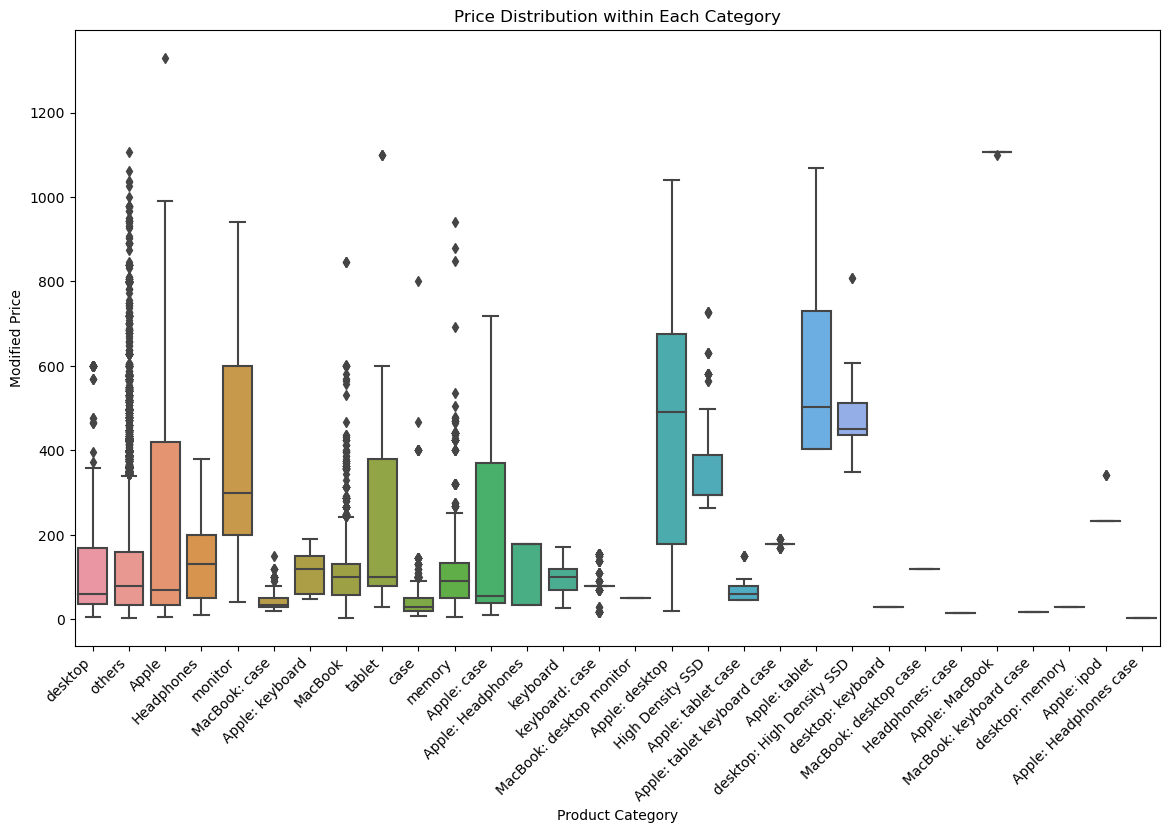

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_merged_ol_prod is your DataFrame

# Create box plots to show the price distribution within each category
plt.figure(figsize=(14, 8))
sns.boxplot(x='category', y='mod_price', data=df_merged_ol_prod)
plt.xlabel('Product Category')
plt.ylabel('Modified Price')
plt.title('Price Distribution within Each Category')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

plt.show()
